# CCT College Dublin 


- Module Title: Machine Learning for AI
- Assessment Title: ML_CA2
- Lecturer Name: David McQuaid
- Student Full Name: Heber Junio Dos Anjos Mota
- Student Number: 2020317
- Assessment Due Date: 31/05/2024
- Date of Submission: 31/05/2024


### Declaration 			
By submitting this assessment, I confirm that I have read the CCT policy on Academic Misconduct and understand the implications of submitting work that is not my own or does not appropriately reference material taken from a third party or other source. I declare it to be my own work and that all material from third parties has been appropriately referenced. I further confirm that this work has not previously been submitted for assessment by myself or someone else in CCT College Dublin or any other higher education institution.

### Github Link
https://github.com/heberjuunior/Heber_ML_CA2

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from keras import Sequential
from keras.layers import Dense 
from tensorflow import keras
from tensorflow.keras import layers
import keras.optimizers 


# Neural Networks
## Data UnderstandingIn the initial phase of this project, we will begin by understanding the provided dataset. This involves gaining insights into the structure and features of the data.ng
We start by loading the dataset. Using the "pd.read_csv" function, we read the "BankRecords.csv" file into a dataframe. Following this, we use the "display()" function to get a preview of the dataset.set.

In [2]:
df = pd.read_csv("BankRecords.csv")
display(df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,Masters,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,Diploma,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,Masters,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,Degree,0,No,No,No,Yes,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands's)    5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

The information above indicates that the dataset includes:

14 columns and 5000 rows, 8 numerical variables and 6 categorical variables.

In [4]:
df.nunique()

ID                       5000
Age                        45
Experience(Years)          47
Income(Thousands's)       162
Sort Code                 467
Family                      4
Credit Score              108
Education                   3
Mortgage(Thousands's)     347
Personal Loan               2
Securities Account          2
CD Account                  2
Online Banking              2
CreditCard                  2
dtype: int64

In [5]:
summary_stats = df.describe()
display(summary_stats)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [6]:
summary_stats_cat = df.describe(include='object')
display(summary_stats_cat)

,Education,Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,Diploma,No,No,No,Yes,No
freq,2096,4520,4478,4698,2984,3530



From the data, we can see that:

Variables have 2 to 3 unique entries, aiding the encoding process.
The "top" category shows the most frequent outcomes.
Most customers do not have a personal loan or credit card, as "NO" is highly frequent.

# Data Visualization

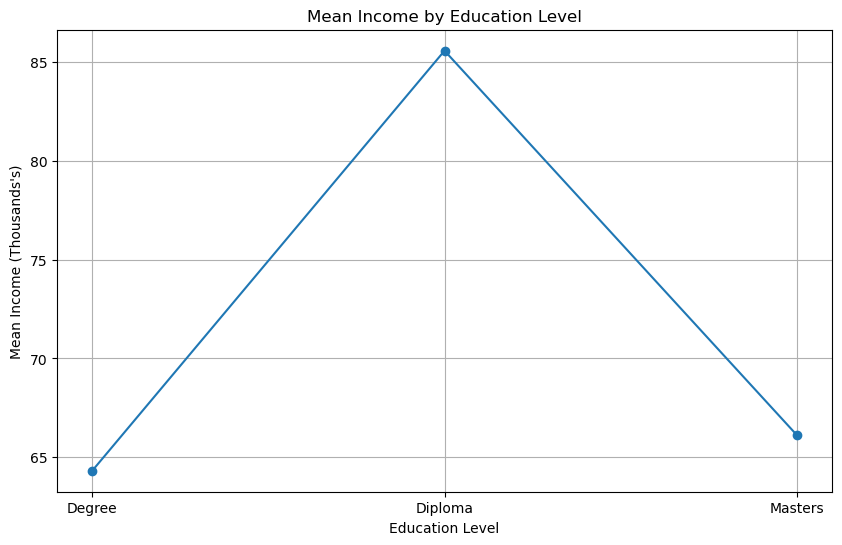

In [7]:
# Calculate the mean income for each education level
mean_income_by_education = df.groupby('Education')["Income(Thousands's)"].mean()

# Plot a line graph for income categorized by education level
plt.figure(figsize=(10, 6))
plt.plot(mean_income_by_education.index, mean_income_by_education.values, marker='o', linestyle='-')
plt.xlabel('Education Level')
plt.ylabel("Mean Income (Thousands's)")
plt.title("Mean Income by Education Level")
plt.grid(True)
plt.show()

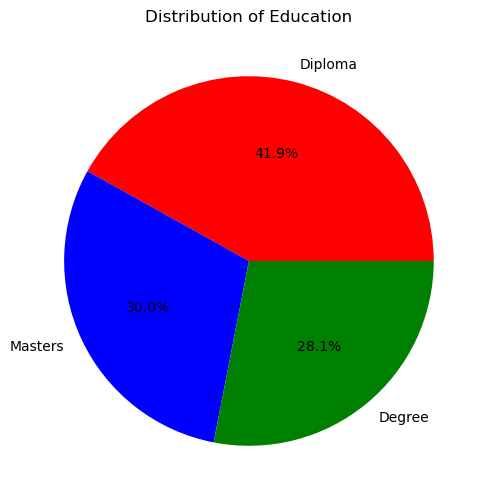

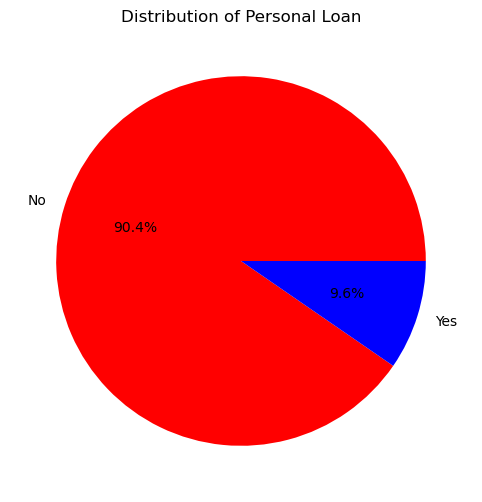

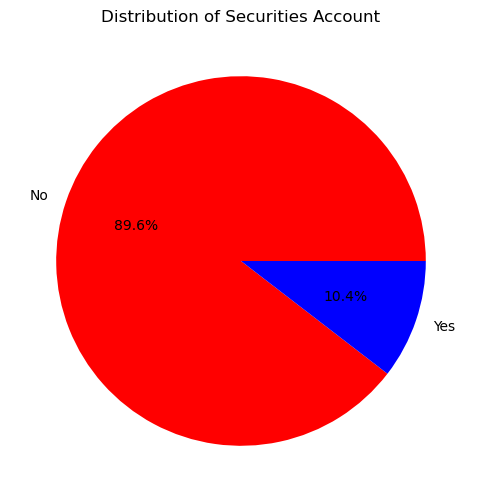

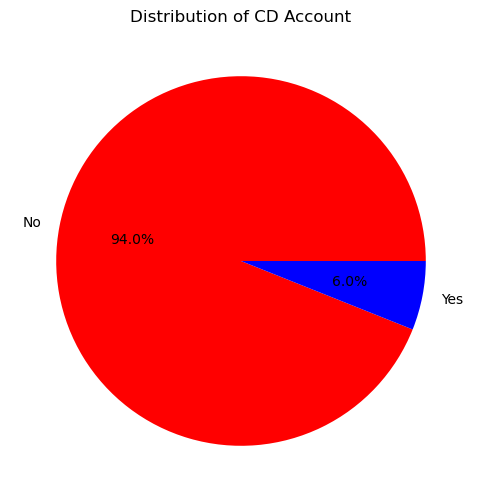

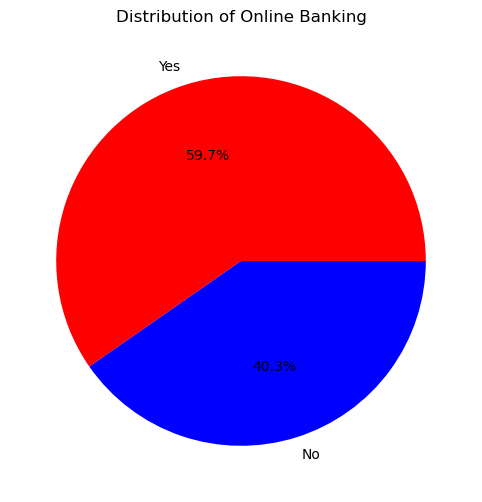

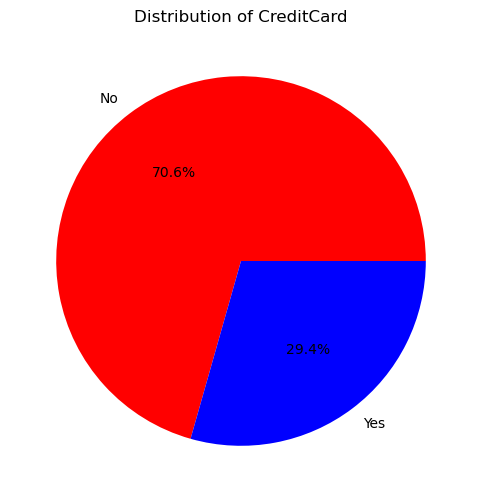

In [8]:
# Define categorical variables
cat_vars = ['Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online Banking', 'CreditCard']
color = ["red", "blue", "green"]

for var in cat_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=color)
    plt.title(f'Distribution of {var}')
    plt.ylabel('')
    plt.show()


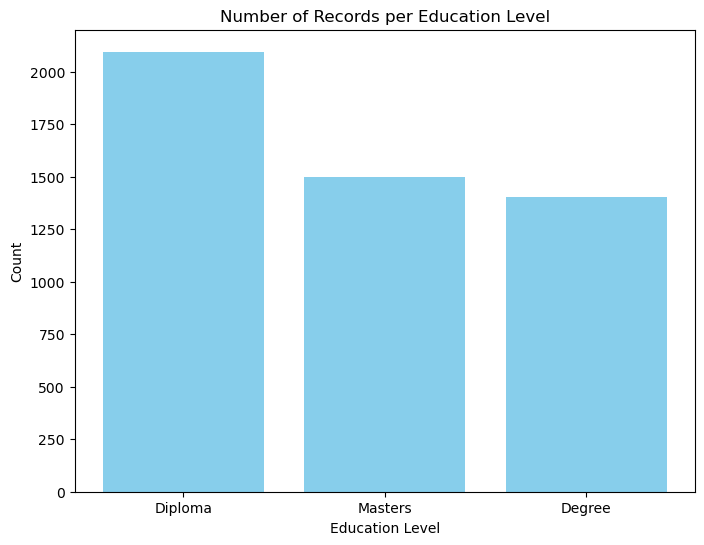

In [9]:
# Count the number of records for each education level
education_counts = df['Education'].value_counts()

# Plot a bar chart for education levels
plt.figure(figsize=(8, 6))
plt.bar(education_counts.index, education_counts.values, color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Number of Records per Education Level')
plt.show()

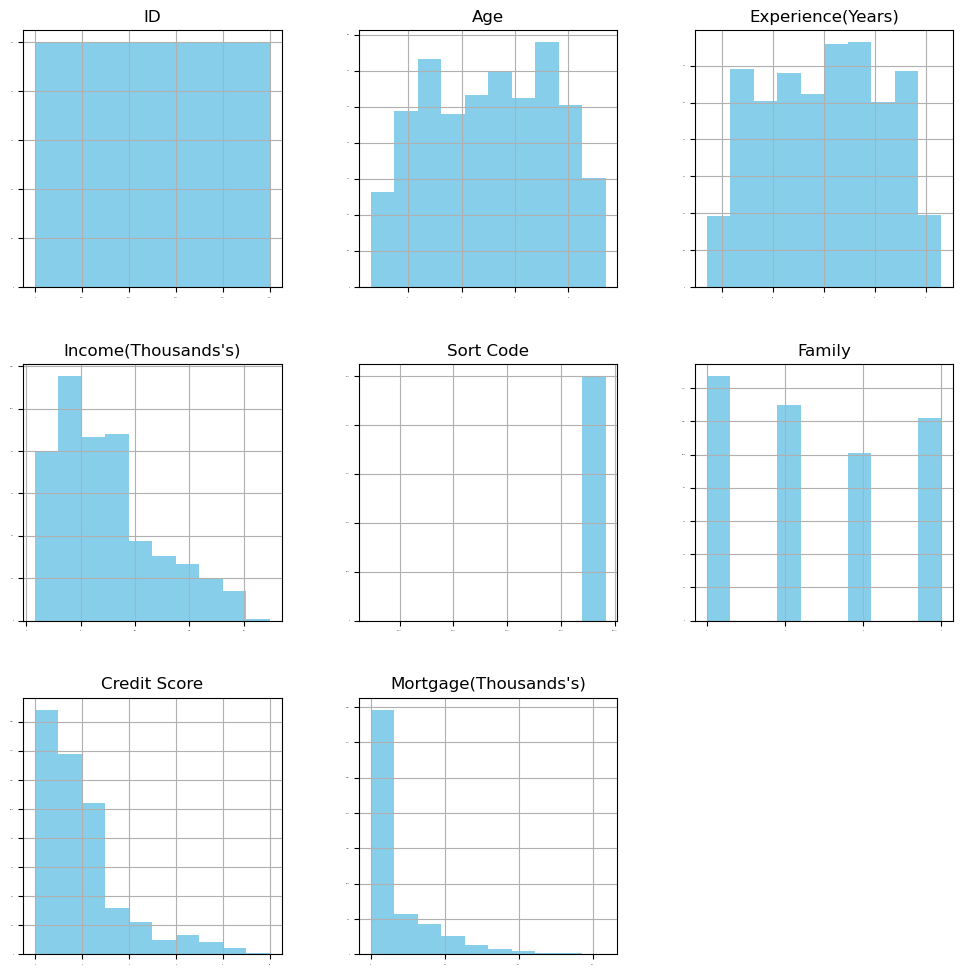

In [10]:
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12, 12), color='skyblue')
plt.show()

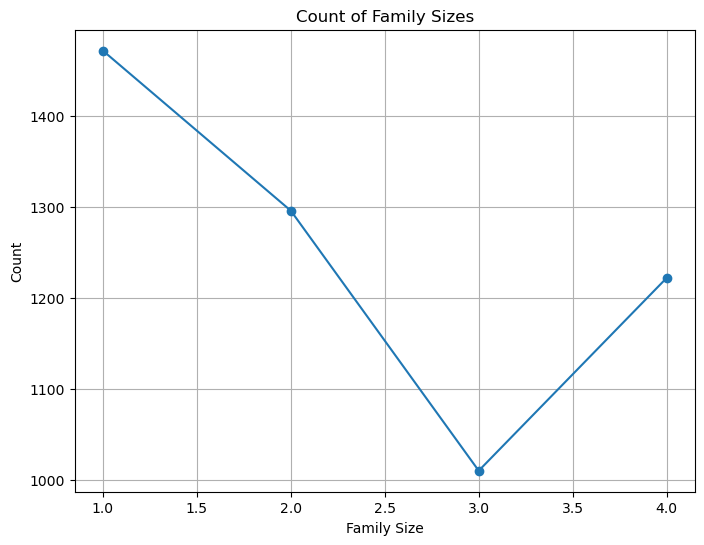

In [11]:
# Count the occurrences of each family size
family_counts = df['Family'].value_counts().sort_index()

# Plot a line graph for family sizes
plt.figure(figsize=(8, 6))
plt.plot(family_counts.index, family_counts.values, marker='o', linestyle='-')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.title('Count of Family Sizes')
plt.grid(True)
plt.show()

# Data Preparation


# Outliers
In this step, we'll look for the outliers. The following visualization depicts the income distribution relative to education levels. Notably, the "Degree" and "Masters" categories exhibit a considerable number of outliers. Nonetheless, I propose against their removal, as these outliers may potentially reveal meaningful patterns.

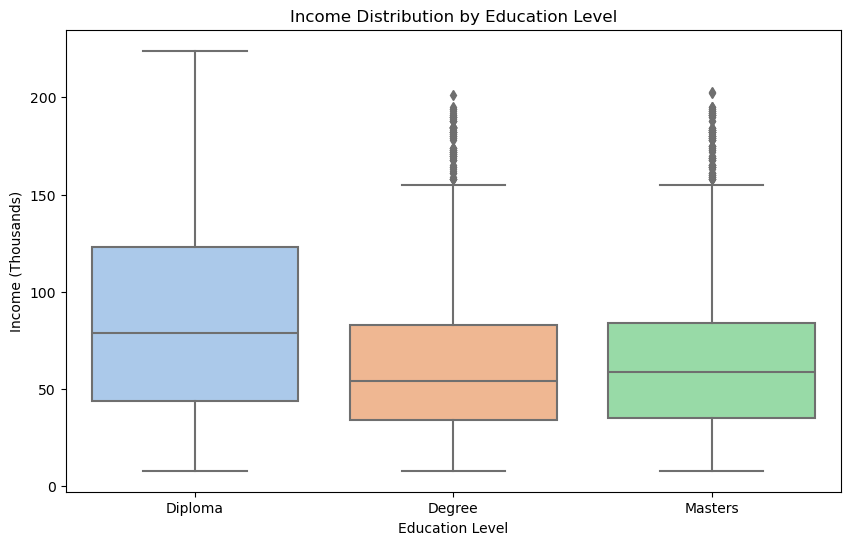

In [12]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y="Income(Thousands's)", palette='pastel')
plt.xlabel('Education Level')
plt.ylabel('Income (Thousands)')
plt.title('Income Distribution by Education Level')
plt.show()


The plot below illustrates relationships between selected columns. Notably, a strong correlation is evident between Age and Experience, which aligns with the intuitive expectation that older individuals tend to possess more experience. Furthermore, there appears to be a correlation between credit score and income levels.

C:\Users\Heber\.ipython\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heber\.ipython\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heber\.ipython\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Heber\.ipython\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

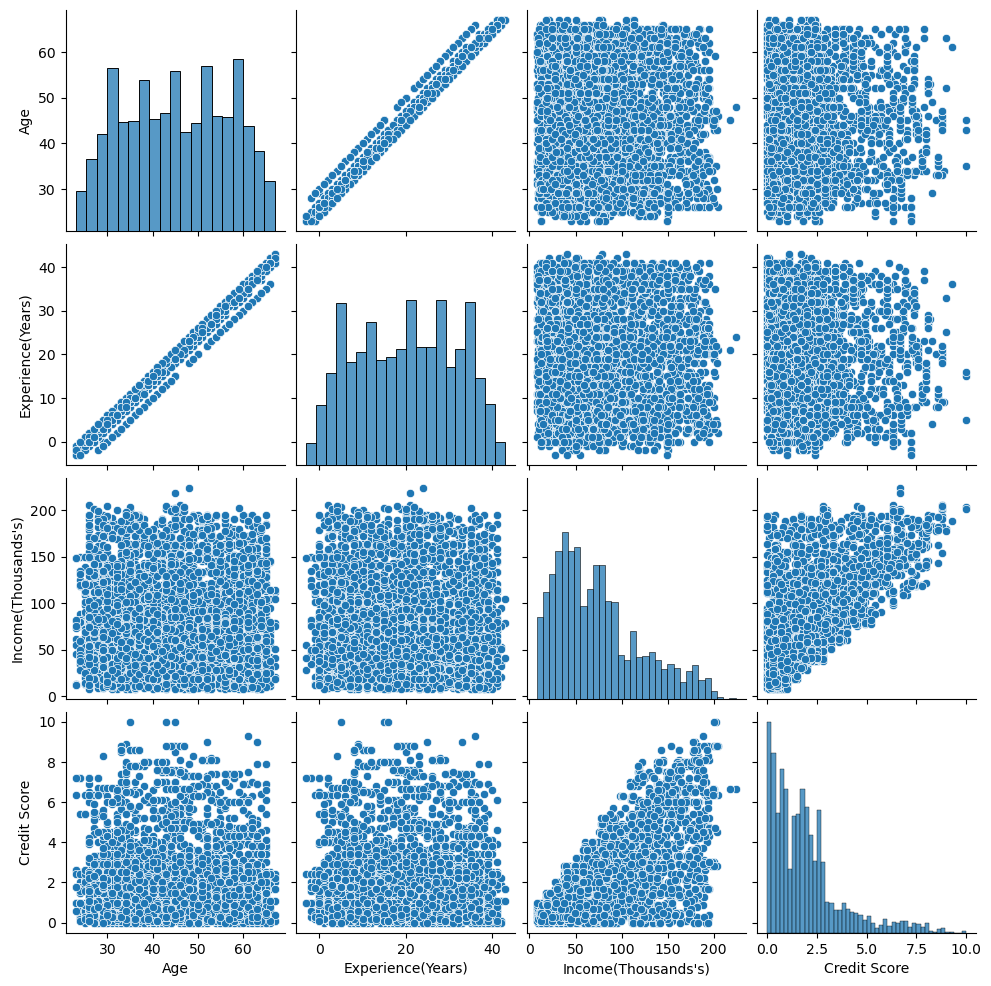

In [13]:
sns.pairplot(df[["Age", "Experience(Years)","Income(Thousands's)", "Credit Score"]])

## Data Scaling & Encoding
In our dataset, we have several independent variables with varying ranges. This discrepancy could potentially affect our predictions, especially when using models like neural networks, where features with larger ranges may dominate the process.

To address this issue, we'll scale our independent variables to the range (0,1). This process, known as min-max scaling, ensures that all features are on a similar scale, preventing any particular feature from dominating the model  due to its larger range.

Encoding education level

In [14]:
education_encoding = {'Diploma': 1, 'Degree': 2, 'Masters': 3}
df['Education'] = df['Education'].map(education_encoding)
display(df)

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,1,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,1,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,2,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,2,0,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,No,No,No,Yes,No
4996,4997,30,4,15,92037,4,0.4,1,85,No,No,No,Yes,No
4997,4998,63,39,24,93023,2,0.3,3,0,No,No,No,No,No
4998,4999,65,40,49,90034,3,0.5,2,0,No,No,No,Yes,No


Drop the 'ID' column

In [15]:
df = df.drop(columns="ID")

Convert binary columns to numerical with 0s and 1s

In [16]:
bin_columns = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]
df[bin_columns] = df[bin_columns].replace({"Yes": 1, "No": 0})

Initializing MinMaxScaler in remaining features

In [17]:
scaler = MinMaxScaler()
numerical_columns = ['Age', 'Experience(Years)', 'Income(Thousands\'s)',"Credit Score","Mortgage(Thousands's)","Education"]
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
display(df)

,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,0.045455,0.086957,0.189815,91107,4,0.16,0.0,0.000000,0,1,0,0,0
1,0.500000,0.478261,0.120370,90089,3,0.15,0.0,0.000000,0,1,0,0,0
2,0.363636,0.391304,0.013889,94720,1,0.10,0.0,0.000000,0,0,0,0,0
3,0.272727,0.260870,0.425926,94112,1,0.27,0.5,0.000000,0,0,0,0,0
4,0.272727,0.239130,0.171296,91330,4,0.10,0.5,0.000000,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,92697,1,0.19,1.0,0.000000,0,0,0,1,0
4996,0.159091,0.152174,0.032407,92037,4,0.04,0.0,0.133858,0,0,0,1,0
4997,0.909091,0.913043,0.074074,93023,2,0.03,1.0,0.000000,0,0,0,0,0
4998,0.954545,0.934783,0.189815,90034,3,0.05,0.5,0.000000,0,0,0,1,0


Define independent and dependent variables

In [18]:
X = df.drop(columns="Income(Thousands's)")
y = df["Income(Thousands's)"]

In [19]:
features = df.drop(columns="Income(Thousands's)")
target = df["Income(Thousands's)"]

Split the data into training and testing sets


In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

# Models
Each algorithm utilized in the analysis offers unique strengths and characteristics in modeling the data:

- **Support Vector Regressor (SVR)**: This algorithm attempts to find the best-fitting line (or hyperplane in higher dimensions) that separates the data into different classes while minimizing the error. It performs reasonably well with a Mean Squared Error (MSE) of 0.0474, indicating its effectiveness in capturing the underlying patterns in the data.

- **Decision Tree Regressor**: Decision trees recursively split the data based on feature values to create a tree-like structure. It achieves a relatively low MSE of 0.0165, indicating its ability to capture complex relationships within the data.

- **Random Forest Regressor**: Random Forest is an ensemble learning technique that combines multiple decision trees to make predictions. Nonetheless, itcould be a bit time consuming, requiring more computing resources and can be more complex. (IBM, 2023). It outperforms the individual decision tree with a lower MSE of 0.00872, showcasing its effectiveness in reducing overfitting and improving prediction accuracy.

- **Gradient Boosting Regressor**: Gradient Boosting builds trees sequentially, where each tree corrects the errors of the previous one. It achieves a competitive MSE of 0.0144, demonstrating its capability to produce accurate predictions by iteratively improving upon the residuals.

- **Linear Regression**: Linear Regression models the relationship between the independent variables and the target variable by fitting a linear equation to the observed data. While it provides interpretable results, it exhibits a slightly higher MSE of 0.0202 compared to the other algorithms, indicating that it may not capture the non-linear relationships present in the data as effectively.

Overall, the Random Forest Regressor stands out as the top performer in terms of MSE. Random Forest Regressor demonstrates their effectiveness in modeling the dataset and making accurate predictions and therefore, will be the one used for our model.

In [21]:
# Define models
regression_models = {
    'Support Vector Regressor': SVR(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
}

# Go through each model
for model_name, model_instance in regression_models.items():
    # Fit the model
    model_instance.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model_instance.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    
    # Print model performance
    print(f"{model_name}: Mean Squared Error = {mse}")


Support Vector Regressor: Mean Squared Error = 0.047448247057956625
Decision Tree Regressor: Mean Squared Error = 0.015905727023319615
Random Forest Regressor: Mean Squared Error = 0.00868307880832476
Gradient Boosting Regressor: Mean Squared Error = 0.014432705249630664
Linear Regression: Mean Squared Error = 0.020243500218211623


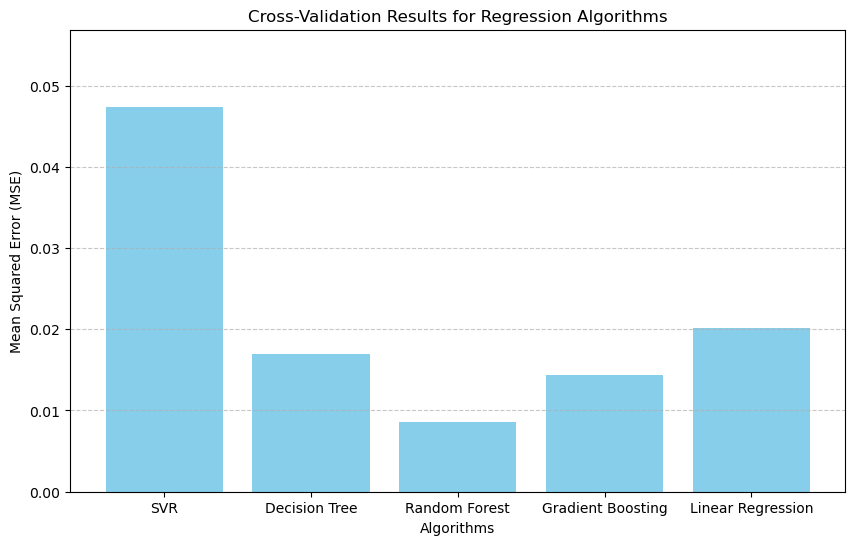

In [22]:
# Define the algorithms and their corresponding MSE scores
algorithms = ['SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'Linear Regression']
mse_scores = [0.0474, 0.0169, 0.00861, 0.0144, 0.0202]  # MSE scores for each algorithm

# Plot the cross-validation results
plt.figure(figsize=(10, 6))
plt.bar(algorithms, mse_scores, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cross-Validation Results for Regression Algorithms')
plt.ylim(0, max(mse_scores) * 1.2)  # Set y-axis limit to show all scores clearly
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In the following code, Grid Search was used to optimize hyperparameters for the selected algorithm. The `param_grid` dictionary contains the hyperparameters tested during this process. Grid Search exhaustively evaluates combinations of these hyperparameters to find the best configuration for the model.ch.

In [23]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200], 
    'max_depth': [None, 10, 20],      
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]      
}

# Initialize Random Forest Regressor
random_forest_regressor = RandomForestRegressor()

# Perform grid search using cross-validation
grid_search_rf = GridSearchCV(random_forest_regressor, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest Regressor:", best_params_rf)

# Get the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_

# Make predictions using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Best Random Forest Regressor - Mean Squared Error:", mse_rf)


Best Hyperparameters for Random Forest Regressor: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Regressor - Mean Squared Error: 0.008553233751852587


In [24]:
# Initialize Random Forest Regressor with best parameters
best_rf_model = RandomForestRegressor(**best_params_rf)

# Fit the Random Forest model with training data
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, n_estimators=200)

In [25]:
# Make predictions using the Random Forest model
y_pred_rf = best_rf_model.predict(X_test)

# Calculate Mean Squared Error for the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regressor - Mean Squared Error:", mse_rf)


Random Forest Regressor - Mean Squared Error: 0.008582580547061602


In [26]:
# Make predictions using the Random Forest model on the training set
y_pred_train_rf = best_rf_model.predict(X_train)

# Calculate Mean Squared Error for the Random Forest model on the training set
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
print("Random Forest Regressor - Mean Squared Error over training set:", mse_train_rf)


Random Forest Regressor - Mean Squared Error over training set: 0.0013344241942062995


The MSE scores for the testing set (0.08) and training set (0.01) indicate a potential overfitting issue, where the model performs significantly better on the training data than on unseen test data. Despite this concern, these scores represent the best performance achieved. Adjusting the ratio between testing and training split sizes resulted in decreased model performance. This suggests a delicate balance between model complexity and generalization ability, highlighting the importance of thorough evaluation and hyperparameter tuning to mitigate overfitting while maximizing predictive accuracy.

# Applying Neural Network
The neural network architecture outlined below follows a structured approach based on established heuristics and research findings:

- **Input layer**: Comprising 12 nodes, each representing a feature in the dataset, the input layer serves as the interface for passing data into the model.

- **Hidden layers**: With guidance from Kirk (2017), the architecture incorporates two hidden layers, a common heuristic for regression tasks. The number of neurons in these layers is determined using heuristics such as being between the number of inputs and outputs, ⅔ the size of the input layer, and less than twice the number of inputs.

- **Activation function**: ReLu (Rectified Linear Unit) is chosen as the activation function due to its computational efficiency and effectiveness in handling positive values. Despite its limitation with negative values, scaling ensures all values in the training and testing sets are positive, making ReLu a suitable choice.

- **Output layer**: Since the problem is a regression task, a single node output layer with a linear activation function is defined to produce predictions.

Through experimentation, ReLu consistently outperformed other activation functions such as ReLu6, Sigmoid, Linear, Tanh, and Gelu, validating its effectiveness in this context.

The optimization function, Adam, has been selected based on its superior performance during the development process. Additionally, parameters such as the number of epochs, batch size, and validation split have been fine-tuned to optimize model performance, with the provided setup yielding the best results.

In [27]:
# Define the neural network model
nn_model = keras.Sequential([
    layers.Dense(12, activation='relu'),
    layers.Dense(6, activation='relu'),
    layers.Dense(2, activation='relu'),
    layers.Dense(1, activation='linear'),
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'accuracy']) 

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=300, batch_size=75, validation_split=0.25)


Epoch 1/300
38/38 [==============================] - 2s 10ms/step - loss: 349.1531 - mae: 12.0255 - accuracy: 3.5562e-04 - val_loss: 12.3476 - val_mae: 3.5060 - val_accuracy: 0.0000e+00
Epoch 2/300
38/38 [==============================] - 0s 4ms/step - loss: 8.4389 - mae: 2.8800 - accuracy: 3.5562e-04 - val_loss: 5.9341 - val_mae: 2.4263 - val_accuracy: 0.0000e+00
Epoch 3/300
38/38 [==============================] - 0s 3ms/step - loss: 4.5954 - mae: 2.1267 - accuracy: 3.5562e-04 - val_loss: 3.5234 - val_mae: 1.8652 - val_accuracy: 0.0000e+00
Epoch 4/300
38/38 [==============================] - 0s 3ms/step - loss: 2.7911 - mae: 1.6522 - accuracy: 3.5562e-04 - val_loss: 2.2106 - val_mae: 1.4724 - val_accuracy: 0.0000e+00
Epoch 5/300
38/38 [==============================] - 0s 3ms/step - loss: 1.7838 - mae: 1.3147 - accuracy: 3.5562e-04 - val_loss: 1.4539 - val_mae: 1.1884 - val_accuracy: 0.0000e+00
Epoch 6/300
38/38 [==============================] - 0s 3ms/step - loss: 1.1917 - mae: 1.0

In [28]:
# Make predictions using the neural network model on the test set
y_pred_nn_test = nn_model.predict(X_test)

# Calculate Mean Squared Error for the neural network model on the test set
mse_nn_test = mean_squared_error(y_test, y_pred_nn_test)
print("Mean Squared Error (Test Set): ", mse_nn_test)

40/40 [==============================] - 0s 2ms/step
Mean Squared Error (Test Set):  0.0483413144097162


In [29]:
# Make predictions using the neural network model on the training set
y_pred_nn_train = nn_model.predict(X_train)

# Calculate Mean Squared Error for the neural network model on the training set
mse_nn_train = mean_squared_error(y_train, y_pred_nn_train)
print("Mean Squared Error (Training Set): ", mse_nn_train)

118/118 [==============================] - 0s 1ms/step
Mean Squared Error (Training Set):  0.04793763860831299


# Conclusion

- The Neural Network (NN) achieved a Mean Squared Error (MSE) of 0.0469 for the testing set and 0.0467 for the training set.
- In comparison, the Random Forest Regressor (RF) achieved significantly lower MSE scores of 0.008 for the testing set and 0.001 for the training set.
- The MSE score for the NN is higher than that of the RF, indicating poorer performance.
- Additionally, the training time for the NN was substantially longer, which indicates its taking more computing power.
- Considering both MSE score and training time, the Random Forest Regressor emerges as the preferred choice for this problem.

Therefore, the **Random Forest Regressor** is going to be my model of choice for this dataset, given its superior performance in terms of both MSE score and training efficiency.

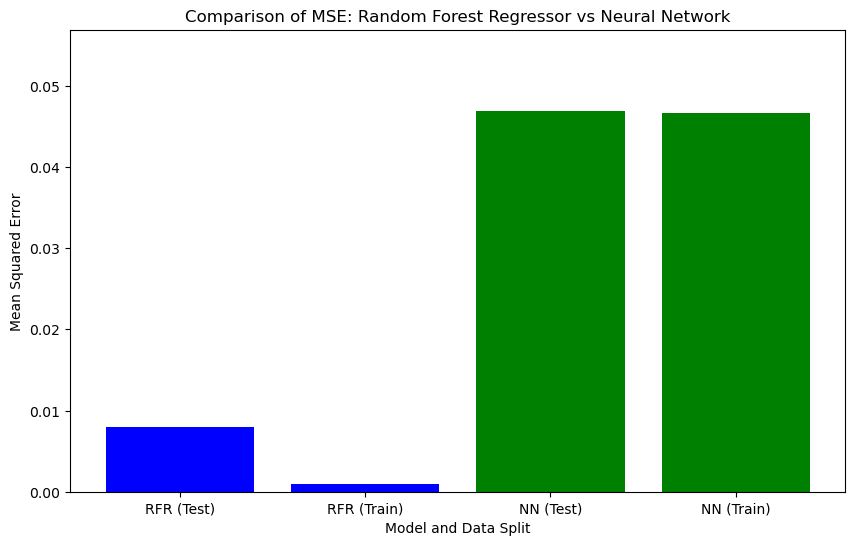

In [30]:
# MSE scores
mse_rfr_test = 0.008
mse_rfr_train = 0.001
mse_nn_test = 0.0469
mse_nn_train = 0.0467

# Labels for the bars
models = ['RFR (Test)', 'RFR (Train)', 'NN (Test)', 'NN (Train)']
mse_scores = [mse_rfr_test, mse_rfr_train, mse_nn_test, mse_nn_train]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'blue', 'green', 'green'])
plt.xlabel('Model and Data Split')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of MSE: Random Forest Regressor vs Neural Network')
plt.ylim(0, max(mse_scores) + 0.01)
plt.show()


# References

- The Analysis Factor. (n.d.). Outliers: To Drop or Not to Drop. [online] Retrieved May 25, 2024, Available at: https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/

- Pierian, J. (n.d.). 7 Machine Learning Regression Algorithms in Python. Pierian Data Inc. Retrieved May 25, 2024, from https://pieriantraining.com/7-machine-learning-regression-algorithms-python/#:~:text=In%20this%20article%2C%20we%20will,Support%20Vector%20Regression%20(SVR).

- GeeksforGeeks. (2024). Neural Networks: A Beginner's Guide. [online] Retrieved May 29, 2024, Available at: https://www.geeksforgeeks.org/neural-networks-a-beginners-guide/

- KDnuggets. (2019). Random Forest vs Neural Network. [online] Retrieved May 29, 2024, Available at: https://www.kdnuggets.com/2019/06/random-forest-vs-neural-network.html


- Python AI: Neural Networks and Deep Learning with Python & Keras. (n.d.). Real Python. Retrieved May 30, 2024, from https://realpython.com/python-ai-neural-network/.

- Neural network models (supervised). (n.d.). scikit-learn. Retrieved May 30, 2024, from https://scikit-learn.org/stable/modules/neural_networks_supervised.html

- Kirk, M. (2017). Thoughtful machine learning with Python : a test-driven approach. 1st ed. Sebastopol, Ca: O’reilly, pp.131–146.

- IBM (2023). What is Random Forest? | IBM. [online] www.ibm.com. Retrieved May 30, 2024. Available at: https://www.ibm.com/topics/random-forest 